In [55]:
import sqlite3
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [99]:
vSqlConnection = sqlite3.connect('resources/coink.db')
vData = pd.read_sql('SELECT * FROM TBT_MONTH_DEPOSIT_AGG', vSqlConnection)
vData["MIN_USER_CREATED_DATE"] = pd.to_datetime(vData["MIN_USER_CREATED_DATE"])
vData["MAX_OPERATION_DATE"] = pd.to_datetime(vData["MAX_OPERATION_DATE"])
vData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   YEAR                   4 non-null      int64         
 1   MONTH                  4 non-null      int64         
 2   MAX_OPERATION_DATE     4 non-null      datetime64[ns]
 3   COUNT_USERS            4 non-null      int64         
 4   DEPOSIT_MIN            4 non-null      float64       
 5   DEPOSIT_MAX            4 non-null      float64       
 6   DEPOSIT_SUM            4 non-null      float64       
 7   DEPOSIT_AVG            4 non-null      float64       
 8   COUNT_DEPOSITS         4 non-null      int64         
 9   MIN_USER_CREATED_DATE  4 non-null      datetime64[ns]
 10  TWO_YEAR_USERS         4 non-null      int64         
 11  ONE_YEAR_USERS         4 non-null      int64         
 12  SIX_MONTHS_USERS       4 non-null      int64         
 13  THREE_MON

C:\Users\Johan\AppData\Local\Temp\ipykernel_23648\207237478.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  vCorrelationMatrix = vData.corr()


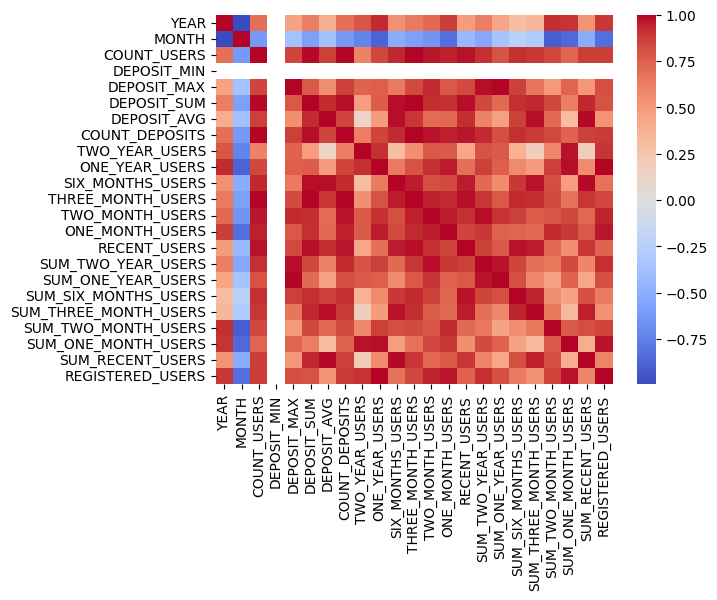

In [100]:
vCorrelationMatrix = vData.corr()
sn.heatmap(vCorrelationMatrix, annot=False, cmap="coolwarm")
plt.show()

In [106]:
# Se obtiene las correlaciones más fuertes en el DataSet.
vCorrelationMatrix[vCorrelationMatrix < 1][vCorrelationMatrix > 0.95].unstack() \
    .transpose().sort_values(ascending=False).drop_duplicates().dropna()

COUNT_DEPOSITS         COUNT_USERS              0.999597
COUNT_USERS            THREE_MONTH_USERS        0.997504
THREE_MONTH_USERS      COUNT_DEPOSITS           0.995859
REGISTERED_USERS       ONE_YEAR_USERS           0.995742
SUM_ONE_YEAR_USERS     DEPOSIT_MAX              0.995060
THREE_MONTH_USERS      DEPOSIT_SUM              0.994881
COUNT_USERS            DEPOSIT_SUM              0.987967
SUM_RECENT_USERS       SIX_MONTHS_USERS         0.987147
DEPOSIT_AVG            SUM_RECENT_USERS         0.984937
                       SUM_THREE_MONTH_USERS    0.984380
DEPOSIT_SUM            COUNT_DEPOSITS           0.983466
THREE_MONTH_USERS      RECENT_USERS             0.983281
DEPOSIT_AVG            SIX_MONTHS_USERS         0.983027
ONE_YEAR_USERS         SUM_ONE_MONTH_USERS      0.980686
DEPOSIT_MAX            SUM_TWO_YEAR_USERS       0.980380
SUM_TWO_YEAR_USERS     TWO_MONTH_USERS          0.980361
RECENT_USERS           DEPOSIT_SUM              0.979880
SIX_MONTHS_USERS       DEPOSIT_

Los valores que se presentan en la lista corresponden a coeficientes de correlación entre diferentes variables de interés en algún tipo de análisis de datos. El coeficiente de correlación es una medida que indica la fuerza y dirección de la relación lineal entre dos variables. Puede variar entre -1 y 1, donde los valores negativos indican una relación inversa, mientras que los valores positivos indican una relación directa.

En este caso, se presentan diferentes valores de correlación entre distintas variables financieras. A continuación, se describen cada uno de ellos y sus implicaciones:

* Se ignora la correlación de COUNT_DEPOSITS (cantidad de depositos realizados) y COUNT_USERS (cantidad de usuarios activos) ya que son variables dependientes. Indicando simplemente que la cantidad de depositos al mes por un usuario es facilmente predecible de X depositos al mes por usuario activo.

* Correlación del 99.75% entre THREE_MONTH_USERS (usuarios activos ingresados entre los últimos 3 y 6 meses) y COUNT_USERS (cantidad de usuarios activos), y correlación de THREE_MONTH_USERS y DEPOSIT_SUM (valor total depositado en el mes) del 99.48%: Indicando que la mayoria de usuarios activos registrados en los últimos tres a seis meses solos responsable de la mayoria de los depositos y el monto total depositado al mes. Lo que indica una fidelización media entre los usuarios activos de la App.

* La correlación de 0.995742 entre ONE_YEAR_USERS y REGISTERED_USERS indica que hay una fuerte relación positiva entre estas dos variables. Esto sugiere que la retención de usuarios es alta en la aplicación, lo que es una buena señal para el negocio. Es decir, los usuarios que se unen a la aplicación tienden a permanecer activos durante un período de tiempo más prolongado, lo que ayuda a aumentar la base de usuarios registrados de la aplicación. Además, esta correlación sugiere que es probable que haya un fuerte compromiso por parte de los usuarios activos de la aplicación a largo plazo, lo que podría ser beneficioso para la empresa que busca fidelizar a sus clientes.

* La variable DEPOSIT_AVG tiene una correlación de 98.49% con SUM_RECENT_USERS (valor depositados por usuarios activos registrados en el último mes) y 98.43% con SUM_THREE_MONTH_USERS (valor depositado por usuarios activos registrados en los últimos 3 a 6 meses). Indicando que son los que más tienden a realizar depositos.

* La variable REGISTERED_USERS (cantidad de usuarios registrados en la App) tiene una alta correlación de 99.57% con ONE_YEAR_USERS (usuarios activos registrados dentro de uno y dos años), ONE_MONTH_USERS (usuarios activos registrados en uno o dos últimos meses), TWO_MONTH_USERS (usuarios activos registrados en dos a tres meses), 90.31% de TWO_YEAR_USERS (usuarios activos registrados entre dos años o más), 88.12% de COUNT_DEPOSITS (depósitos al mes): Esto índica que se puede asumir la cantidad de usuarios activos en la App usando la cantidad de total de usuarios registrados en la App y la cantidad de depósitos esperados en el mes.

Nota: Esto es un DataSet reducido de solo cuatro meses sin el total de la base de datos, por lo que en producción el resultado puede variar ante la falta de información.

<Axes: xlabel='MAX_OPERATION_DATE'>

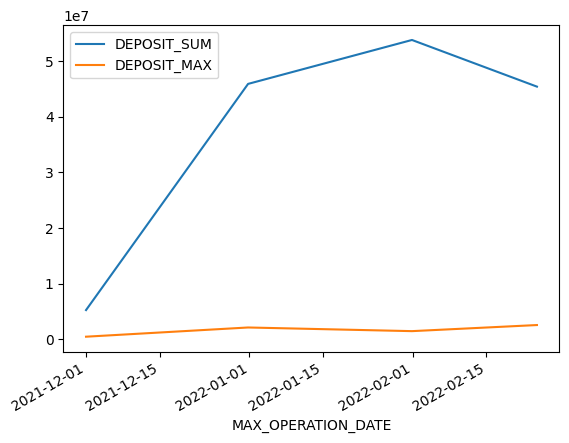

In [107]:
vData.plot(x = "MAX_OPERATION_DATE", y = ["DEPOSIT_SUM", "DEPOSIT_MAX"])

Al analizar los datos, se observa una correlación significativamente baja entre el valor máximo del depósito y el número total de usuarios registrados en la aplicación, en comparación con la correlación existente entre el total de depósitos realizados y el número de usuarios registrados.

Este hallazgo sugiere que el total depositado por mes no es realmente un campo que afecte significativamente al total de usuarios registrados en la aplicación. En su lugar, se puede afirmar que el número de depósitos realizados por los usuarios es un factor más importante en la determinación del número total de usuarios registrados en la aplicación.

En otras palabras, este resultado indica que para aumentar el número total de usuarios registrados en la aplicación, es más efectivo tener una gran cantidad de usuarios que realicen varios depósitos pequeños en lugar de una reducida cantidad de usuarios con depósitos grandes. Este hallazgo puede ser de gran utilidad para diseñar estrategias efectivas de marketing y fidelización de usuarios en la aplicación.

<Axes: xlabel='MAX_OPERATION_DATE'>

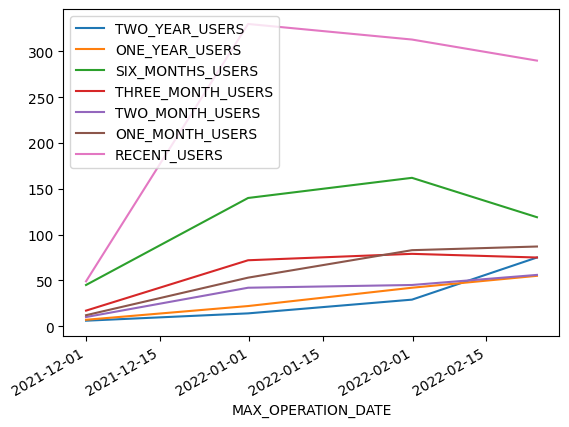

In [108]:
vData.plot(x = "MAX_OPERATION_DATE", y = ["TWO_YEAR_USERS", "ONE_YEAR_USERS", "SIX_MONTHS_USERS", "THREE_MONTH_USERS", "TWO_MONTH_USERS", "ONE_MONTH_USERS", "RECENT_USERS"])

<Axes: xlabel='MAX_OPERATION_DATE'>

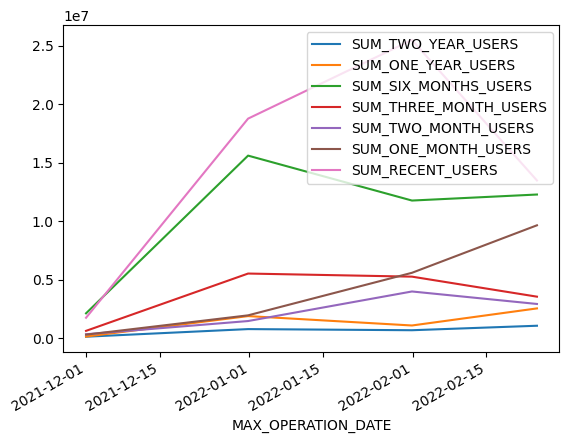

In [109]:
vData.plot(x = "MAX_OPERATION_DATE", y = [
 "SUM_TWO_YEAR_USERS",
 "SUM_ONE_YEAR_USERS",
 "SUM_SIX_MONTHS_USERS",
 "SUM_THREE_MONTH_USERS",
 "SUM_TWO_MONTH_USERS",
 "SUM_ONE_MONTH_USERS",
 "SUM_RECENT_USERS"
])

Se puede observar a través del análisis de las gráficas que existe una clara tendencia en cuanto al comportamiento de los usuarios en lo que respecta al monto de los depósitos que realizan. En particular, se puede notar que los usuarios recién registrados, es decir aquellos que llevan menos de un mes en la aplicación, son los que realizan los mayores depósitos, seguidos por aquellos usuarios que llevan entre 6 meses y un año en la plataforma.

Estos resultados sugieren una alta fidelidad por parte de los usuarios a corto y medio plazo. Sin embargo, se identifica una disminución significativa en el número de depósitos realizados por aquellos usuarios que llevan entre uno y dos años de antigüedad en la aplicación, así como por aquellos usuarios que llevan más de dos años utilizando la plataforma.

Esto implica que la aplicación depende en gran medida de la fidelización a medio plazo de los usuarios y de un flujo constante de nuevos usuarios para mantener el ritmo de depósitos. En este sentido, se hace evidente la importancia de implementar estrategias de retención de usuarios a largo plazo y de atracción de nuevos usuarios con el fin de mantener un crecimiento sostenible y constante en la plataforma. 